# Project Title: Heart Disease Prediction using Classification Algorithms

In this project, I predicted the 10-year risk of coronary heart disease using Gaussian Naïve Bayes and K-Nearest Neighbor algorithms. The dataset includes features like BMI, age, gender, and smoking habits. The project highlights data cleaning, feature engineering, and model training and evaluation, achieving high accuracy in classification tasks. Tools used include Pandas, NumPy, Matplotlib, Seaborn, Sklearn, and SMOTE. This project showcases the application of classification techniques in a healthcare context.

**Step One: importing all libraries to be used in assignment.**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sklearn

**Step Two: loading CSV file (data) into pandas dataframe.**

In [59]:
df=pd.read_csv('framingham.csv')

**Step Three: Exploratory Data Analysis (EDA). An important part of data analysis is EDA, this helps visualize the data, check the data's descriptive stats and check what is happening with the data. The descriptive stats usually tells us if there's any variation in the data and if the data has no outliers. EDA also helps one see if they have any missing values and how they should attend to them.**

In [60]:
# Viewing first 5 columns to check what data looks like and if it was loaded correctly
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


From what we see in the dataset, we can see that we only have numerical data. We can also see that our target variable (TenYearCHD) is binary.

In [61]:
#Checking the size of data.
df.shape

(4238, 16)

The dataset had 16 rows and 4238 columns.

In [62]:
# Checking the data types of each column in pandas dataframe, and if the are any null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Here we can see that our dataset has a couple of null values and once again we can actually see that our data types are integers and floats which are just numerical variables.

In [63]:
#Viewing descriptive statistics of dataframe (df.describe()), the T is to transpose the dataframe so that the rows become column names and vice versa.
df.describe().round(2).T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


Viewing the descriptive stats helps us see how the data is distributed. We can also see that certain features such as totChol, sysBP,diaBP may contain outliers as they have a broad range of values. This also tells us that feature scaling should be applied before applying ML algorithms to ensure that data is in the same range. 

In [64]:
#Viewing number of missing values per column
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

We can see things such as education, cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose have missing values. The missing values are actually 12,85% of the dataset and that's not too bad, we could decide to drop them but I won't.

In [65]:
#Assigning missing columns names to columns
columns = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

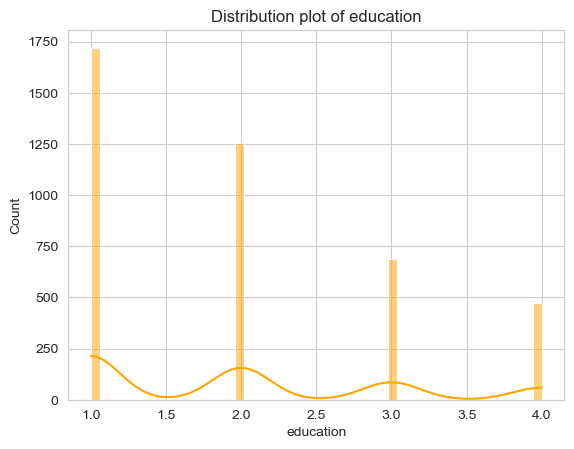

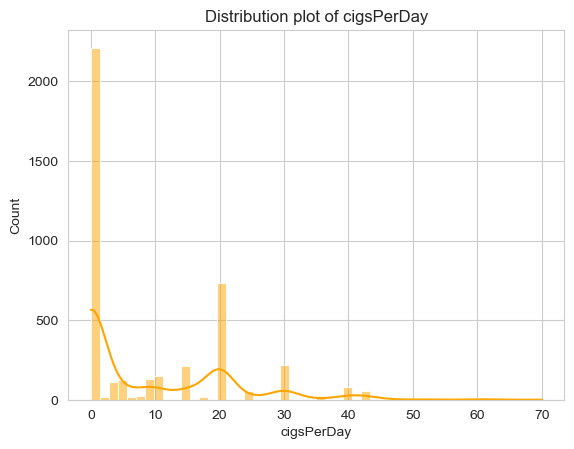

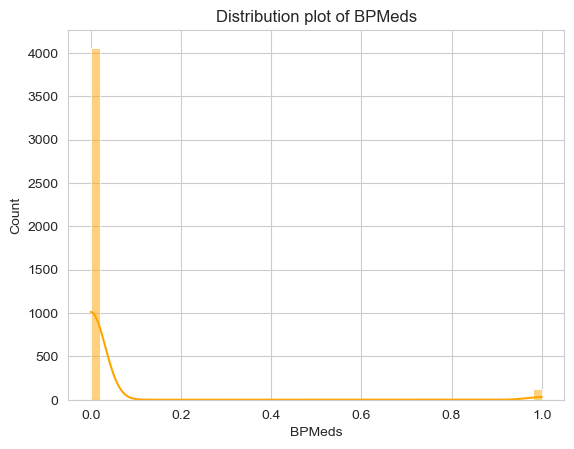

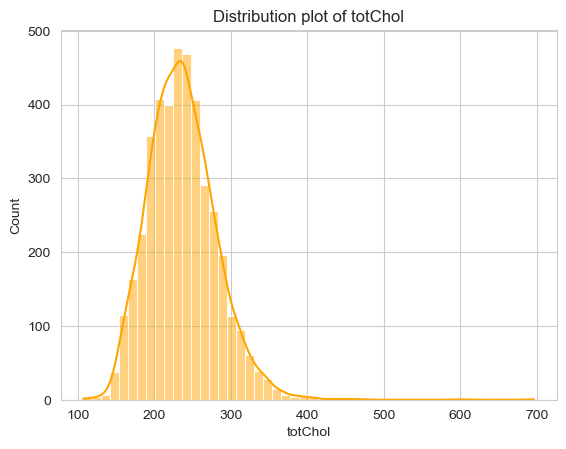

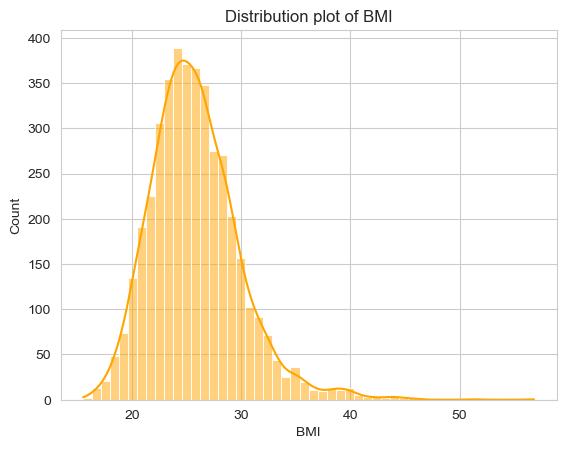

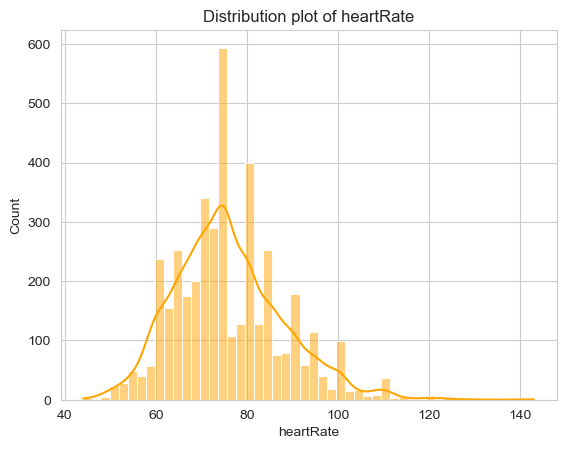

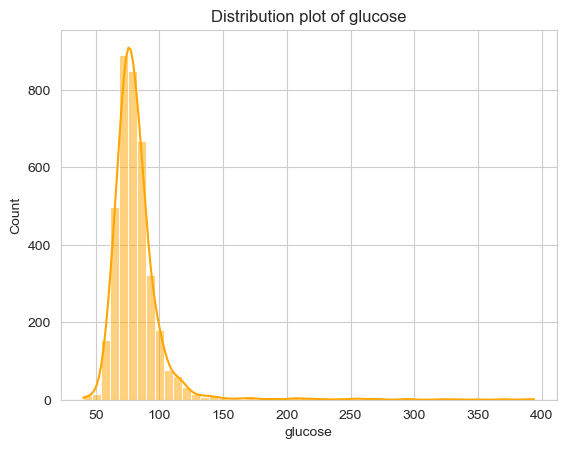

In [66]:
#Performing a for loop so that I can view distribution plots of columns with missing values
sns.set_style("whitegrid")
for col in columns:
    sns.histplot(data=df, x=col, kde=True, bins=50, color='Orange')
    plt.title(f"Distribution plot of {col}")
    plt.show()

From the distribution plot we can't really see how well the education column is distributed this could be due to the fact that it is filled with categorical variables (1 to 4), I've decided to drop this column and only 2.4% of the entire data will be missing. From the distribution plots we can also see that cigsPerDay and BPMeds are right skewed so we will use the median to fill in the missing values. We can also see that totChol, BMI, heartRate and glucose have somewhat normal didstributions so we will use the mean to fill these columns. 

In [67]:
#Dropping education column
df= df.drop(columns=['education'])

In [68]:
#Creating list with cigsPerDay and BPMeds in variable names median columns
median_columns= ['cigsPerDay', 'BPMeds']

In [69]:
#Creating a for loop so I can easily fill columns with median
for col in median_columns:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

In [70]:
#Creating list with totChol, BMI, heartRate, glucose varible names mean columns
mean_columns=['totChol', 'BMI', 'heartRate', 'glucose']

In [71]:
#Creating a for loop so I can easily fill columns with mean
for col in mean_columns:
    mean_val= df[col].mean()
    df[col].fillna(mean_val, inplace= True)

In [72]:
#lets view our data and see if we filled everything and that we have no missing values
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**Step Four: Data Visualization. To check if there is any relationship within the data.**

In [73]:
#Assigning df.corr() to variable corr.
corr= df.corr()

<Axes: >

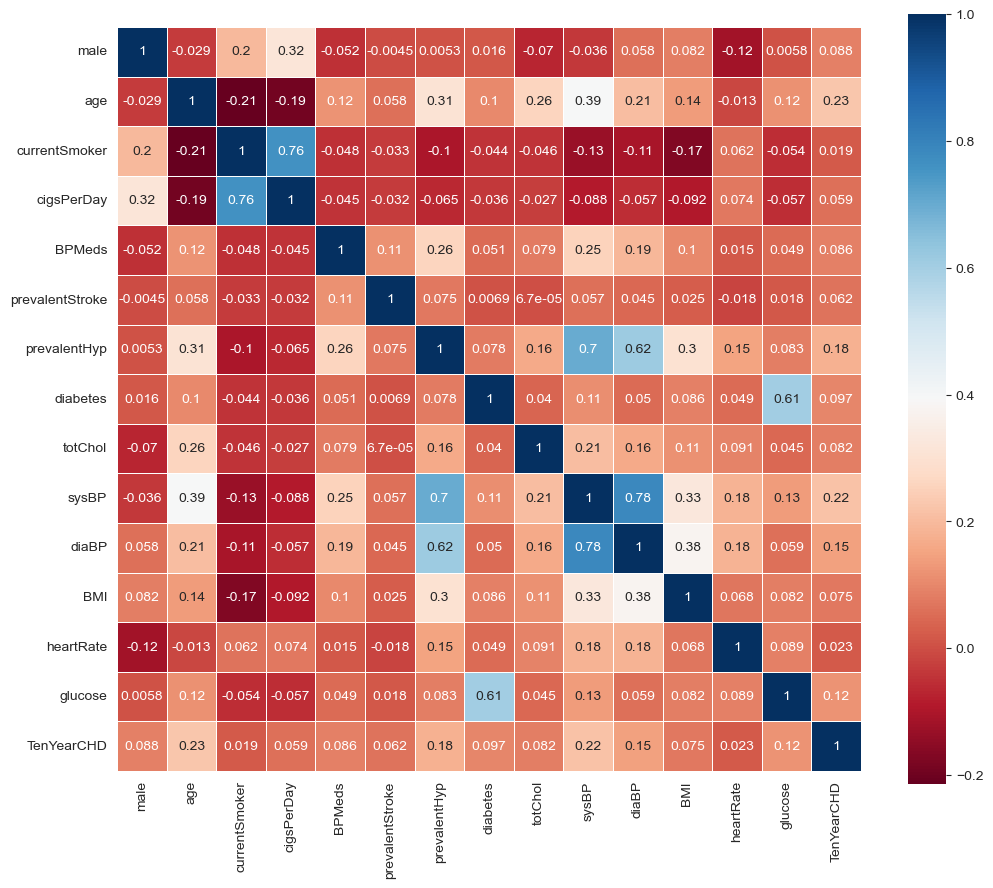

In [74]:
#Visulaising heatmap and displaying the correlation in the heatmap 
#Made figure size 12,10 so we can properly see the coefficients
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, square=True, linewidths=.5)

From the heatmap we can see that our predictor variables have a positive correlation with the target variable (TenYearCHD). We can see that there is a strong correlation between sysBP and diaBP, and a strong correlation sysBP and prevalenetHyp and a high correlation between diabetes and glucose. Strong and high correlation among features could lead to multicollinearity.

In [75]:
#Checking if dataset is balanced
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

We can see that we have 3594 zero's for our target variable and 644 one's. This means that our dataset is not balanced.

(array([3594.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         644.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

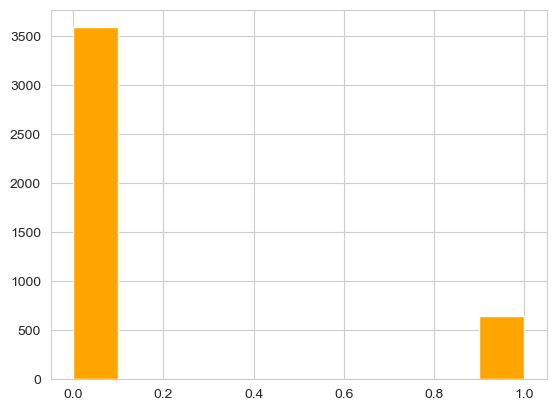

In [76]:
#Plotting a histogram to visualy see the imbalance in the target variable
plt.hist(df['TenYearCHD'], color='Orange')

In [77]:
# we are importing SMOTE as we will use this to balance our target variable 
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [78]:
#Generating synthetic data that will balance our target variable
X,y= make_classification(n_classes=2, 
                        n_features=14, n_samples= 500, random_state=42)

In [79]:
#Spliting dataset into training and testing for balancing
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [80]:
#Balancing dataset using SMOTE
smote= SMOTE(random_state=42)
X_train_resampled, y_train_resampled=smote.fit_resample(X_train, y_train)

In [81]:
#Defining our X and Y variable
X= df.drop(['TenYearCHD'], axis=1)
y= df['TenYearCHD']

In [82]:
#Balancing the input data by creating synthetic data for minority class (1.0)
X_smote_train, y_smote_train= smote.fit_resample(X,y)

(array([3594.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3594.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

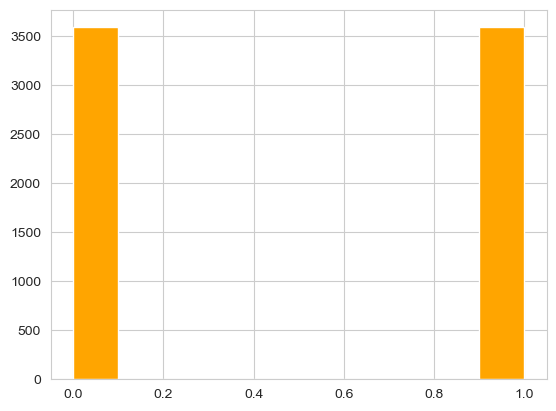

In [83]:
#Visualiizing if SMOTE worked. Our target variable is now balanced. 
plt.hist(y_smote_train, color='Orange')

**Step five: Standardizing features.**

In [84]:
#Importing standard scaler from sklearn so that we may standardize our data
from sklearn.preprocessing import StandardScaler

In [85]:
#Fitting our scaler data and transforming it 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

**Step six: Training Gaussian Naive Bayes model and KNN with both models being evaluated.**

In [86]:
#Importing all the necessary libraries for training and evaluation of Gaussian Naive Bayes Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [87]:
gnb = GaussianNB()

In [88]:
#fitting our training, re-scaled and resampled data set into Gaussian Naive Bayes
gnb.fit(X_train_scaled, y_train_resampled)

GaussianNB()

In [89]:
#Predicitng dependent variable using X_test_scaled
gnb_y_pred= gnb.predict(X_test_scaled)
print(gnb_y_pred)

[1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1
 1 0]


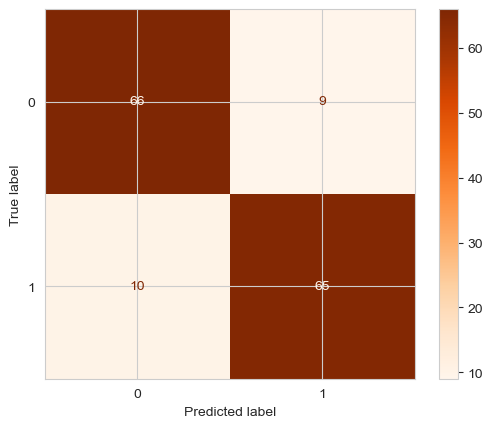

In [90]:
gnb_conf_matrix = confusion_matrix(y_test, gnb_y_pred)
gnb_display = ConfusionMatrixDisplay(confusion_matrix=gnb_conf_matrix)
gnb_display.plot(cmap='Oranges')
plt.show()

The above table is called a confusion matrix, it basically shows the performance of the model by classifying the model's prediction into four groups:
1. True Positives: The model accurately predicted positive outcomes correctly- class 1 instances actually predicted as class one. (65).
2. False Positive: The model predicted a positive outcome but it is incorrect-predicted class 1 instead of 0 (9).
3. True Negative: The model accurately predicted a negative outcome correctly-class instance 0 correctly predicted as 0 (66).
4. False Negative: The model predicted a negative outcome and is incorrect- Predicted 0 instead of 1 (10).

In [91]:
#Printing classification report
print( classification_report(y_test, gnb_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        75
           1       0.88      0.87      0.87        75

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



The above report is a classification report for the algorithm (I see it as in depth confusion matrix). 
Precision is defined as the ratio of true positive prediction to all positive predictions, it basically measures the accuracy rate of the positive class prediciton. 
Class 0(No TenYearCHD): Precision is 87% accurate in predicting positive class.
Class 1 (Yes TenYearCHD): Precision is 88% in accurate in predicting positive class.

Recall: This is defined as the ratio of true positives to the actual positivess in the dataset. It shows how frequently the model correctly identifie strue positives. 
Class 0: 88% of class 0's were predicted correctly.
Class 1: 87% of class 1's were predicted correctly.

F1-Score: This is defined as the harmonic mean of precision and recall and it provides a balance between precision and recall. 
Class 0: 87%.
Class 1: 87%.

Support: The is defined as the precise number of instance for each type.
Class 0: 75 samples.
Class 1: 75 samples.

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score

In [93]:
auc_gnb= roc_auc_score(y_test, gnb_y_pred)
print(auc_gnb)

0.8733333333333334


The above is the accuracy prediction of the Gaussian Naive Bayes model, it correctly predicted the class labels for 87,33% of the test samples. However, we use the confusion matrix and classification report for greater detail and visualization.

In [94]:
fpr_gnb, tpr_gnb, thresholds_gnb= roc_curve(y_test, gnb_y_pred)

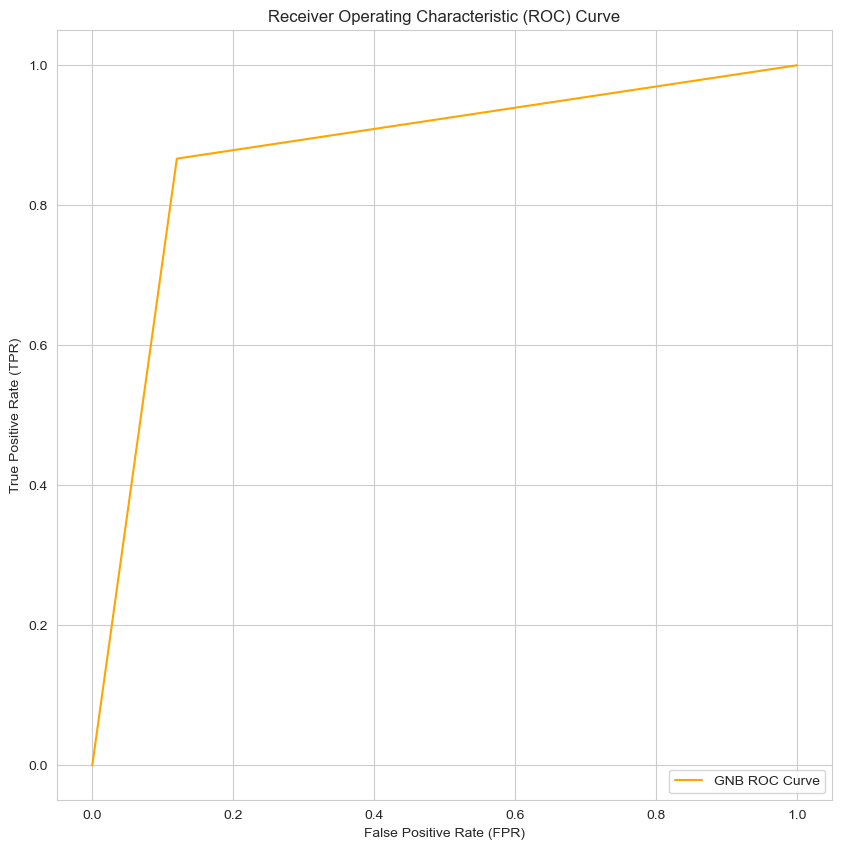

In [95]:
plt.figure(figsize=(10, 10))
plt.plot(fpr_gnb, tpr_gnb, color='orange', label='GNB ROC Curve')  # Added label here
plt.grid(True)

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


The above graph shows that TPR increases quickly as the FPR starts to increase from zero. This rapid, sharp increase shows that this is a good model is performing well as it produces more true postives and fewer false positives. We can see that the AUC (area under curve) is high.

**KNN Model training and evaluation**

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier(n_neighbors=5)

In [98]:
knn.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier()

In [99]:
knn_y_pred = knn.predict(X_test_scaled)
print(knn_y_pred)

[1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1
 1 1]


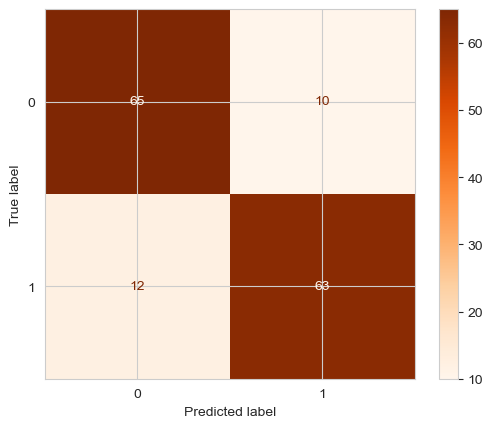

In [100]:
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_display = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix)
knn_display.plot(cmap='Oranges')
plt.show()

The above table is called a confusion matrix, it basically shows the performance of the model by classifying the model's prediction into four groups:
1. True Positives: The model accurately predicted positive outcomes correctly. (63).
2. False Positive: The model predicted a positive outcome but it is incorrect (10).
3. True Negatives: The model accurately predicted a negative outcome correctly (65).
4. False Negatives: The model predicted a negative outcome and is incorrect (12). 

In [101]:
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        75
           1       0.86      0.84      0.85        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



The above report is a classification report for the algorithm.
Precision is defined as the ratio of true positive prediction to all positive predictions, it basically measures the accuracy rate of the positive class prediciton. 
Class 0(No TenYearCHD): Precision is 84% accurate in predicting positive class.
Class 1 (Yes TenYearCHD): Precision is 86% in accurate in predicting positive class.

Recall: This is defined as the ratio of true positives to the actual positivess in the dataset. It shows how frequently the model correctly identifie strue positives. 
Class 0: 87% of class 0's were predicted correctly.
Class 1: 84% of class 1's were predicted correctly.

F1-Score: This is defined as the harmonic mean of precision and recall and it provides a balance between precision and recall. 
Class 0: 86%.
Class 1: 85%.

Support: The is defined as the precise number of instance for each type.
Class 0: 75 samples.
Class 1: 75 samples.

In [102]:
auc_knn= roc_auc_score(y_test, knn_y_pred)
print(auc_knn)

0.8533333333333333


The above is the accuracy prediction of the K Nearest neighbour, it correctly predicted the class labels for 85,33% of the test samples. However, we use the confusion matrix and classification report for greater detail and visualization.

In [103]:
fpr_knn, tpr_knn, thresholds_knn= roc_curve(y_test, knn_y_pred)

Text(0, 0.5, 'True Positive Rate(tpr)')

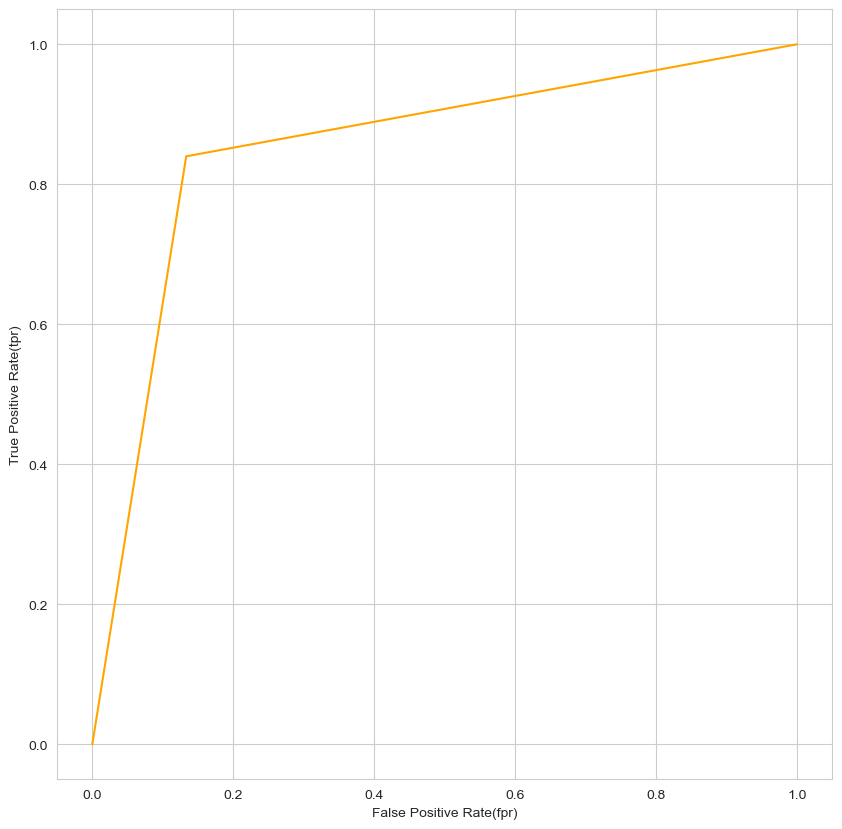

In [104]:
plt.figure(figsize=(10, 10))
plt.plot(fpr_knn, tpr_knn, color='orange')
plt.grid(True)

plt.xlabel('False Positive Rate(fpr)')
plt.ylabel('True Positive Rate(tpr)')



The above graph shows that TPR increases quickly as the FPR starts to increase from zero. This rapid, sharp increase shows that this is a good model is performing well as it produces more true postives and fewer false positives. We can see that the AUC (area under curve) is high but lower than GNB.  

# Test size evaluation:

With a test size of 0.4 (which is 60% of the dataset is for training and 40% for testing):
1. GNB accuracy = 89%
2. KNN accuracy= 83%

With a test size of 0.3 (which is 70% of the dataset is for training and 30% for testing)
1. GNB acuracy= 87%
2. KNN accuracy= 85%

This showed that reducing the test size causes a decrease in the accuracy of the GNB model and an increase for KNN. This could be because having a larger training dataset could possibly provide the KNN model with more neighboring points when making a classification decision hence the better model performance. 

# Model Evaluation of Gaussian Naïve Bayes VS K-Nearest Neighbors:

Confusion matrix:
1. True positives, GNB performed better in identifying true positives.
2. False positives, GNB performed better at minimizing false positives.
3. True Negatives, GNB performed better in identifying negative cases.
4. False Negatives, GNB performed better in identifying true positives

Classification reports:
A classification report is an evaluation metrics that is used in machine learning to measure how accurate a classification algorithm predicts an outcome. The report included various metrics that are calculated from the confusion matrix. In the classification report of this dataset for accuracy we could easily see that GNB is slightly higher than KNN, this means that GNB correctly predicted a higher percentage of the overall dataset as compared to KNN. For precision GNB also performed slightly better than KNN. For recall GNB showed to be better at predicting more accurate results as compared to KNN. GNB was also slightly higher for F1-scores which showed a better balance between recall and precision.

ROC and AUC:
A Receiver Operating Characteristic curve (ROC) shows how a classification model performed at all classification thresholds and the curve plots two parameters, False Positive Rate and True Positive Rate. The ROC can be used for comparing test results as it is not dependent on an external and ad hoc specified threshold values.From the ROC graphs we can see that the GNB model has more rapid increase in TPR as compared to the KNN model. We can also see that the AUC of KNN is lower than that of GNB. 
 



# Conclusion

For all evaluation metric’s GNB performed better, this could possibly be since GNB is based on the Bayes theorem (probability theory), and it assumes that predictor variables are independent. To improve the GNB model, feature engineering could have been considered, where any irrelevant features are dropped to help reduce noise in the model. Another way GNB could have been improved is maybe using it with another machine learning model such as logistic regression to make up for the concept/ assumption of independence among predictor variables. To improve the KNN model, perhaps weighted KNN could have been considered instead of giving equal weight to all neighbors. Methods such as PCA (Principal Component Analysis) could have been considered to help reduce the dimension. Through the application of these model improvements, some of the limitations of both models are addressed and this could possibly give better predictive and reliable results.